# Spark Internship


## Data Science and Business Analytics

## Task 6

Prediction using Supervised Machine Learning
 




## Iris Flower Classification and Prediction

Problem Statement:

Create Decision Tree Classifier for Iris Flower dataset.The Species category of the Iris flower should be identified in prediction.Here we will find different classes of flower based on the Length and Width of Sepal and Petal.It is multi class problem since it has three classes.

Prediction:

The purpose is if we feed any new data to this classfier, it would be able to predict the right class accordingly.And also Visualize the Decision Tree classifier graphically

## Multi Class Classification Problem

In [1]:
#import all libaries
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv(r"C:\Users\Srividya\Downloads\Iris.csv")
df.to_csv("Iris Flower Classification.csv",sep='\t')

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
#create dataframe
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.shape

(150, 6)

Here 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' columns having continous values.
The Target column is 'Species' and it is having categorical nominal data type.
Hence it is Classification Problem

In [6]:
df.columns #checking column names

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Checks column Data type and non null values information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Exploratory Data Analysis


In [8]:
df.isnull().sum().T #checking null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Here columns has no null values

In [9]:
df.apply(lambda x: len(x.unique())) # getting unique values of all the columns

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

<AxesSubplot:>

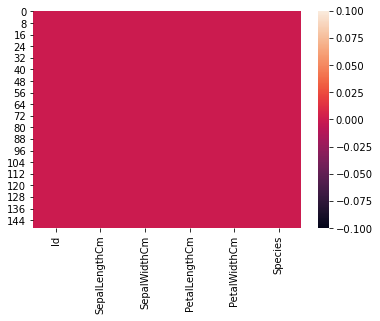

In [10]:
#visualizing the null values using heatmap
sns.heatmap(df.isnull())

Heatmap shows no null values present

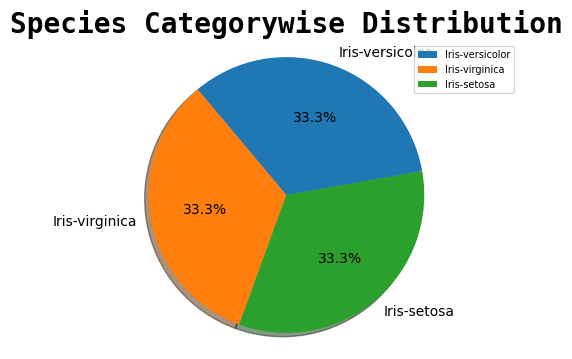

In [11]:
# Creating a pie chart 
ax = df['Species'].value_counts()

plt.style.use('default')
plt.figure(figsize=(6, 4))
plt.pie(ax.values, labels=ax.index, startangle=10, explode=(None), shadow=True, autopct='%1.1f%%')
plt.title('Species Categorywise Distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

The Different Classes of Species are equally distributed And well balanced.

## VISUALIZATION

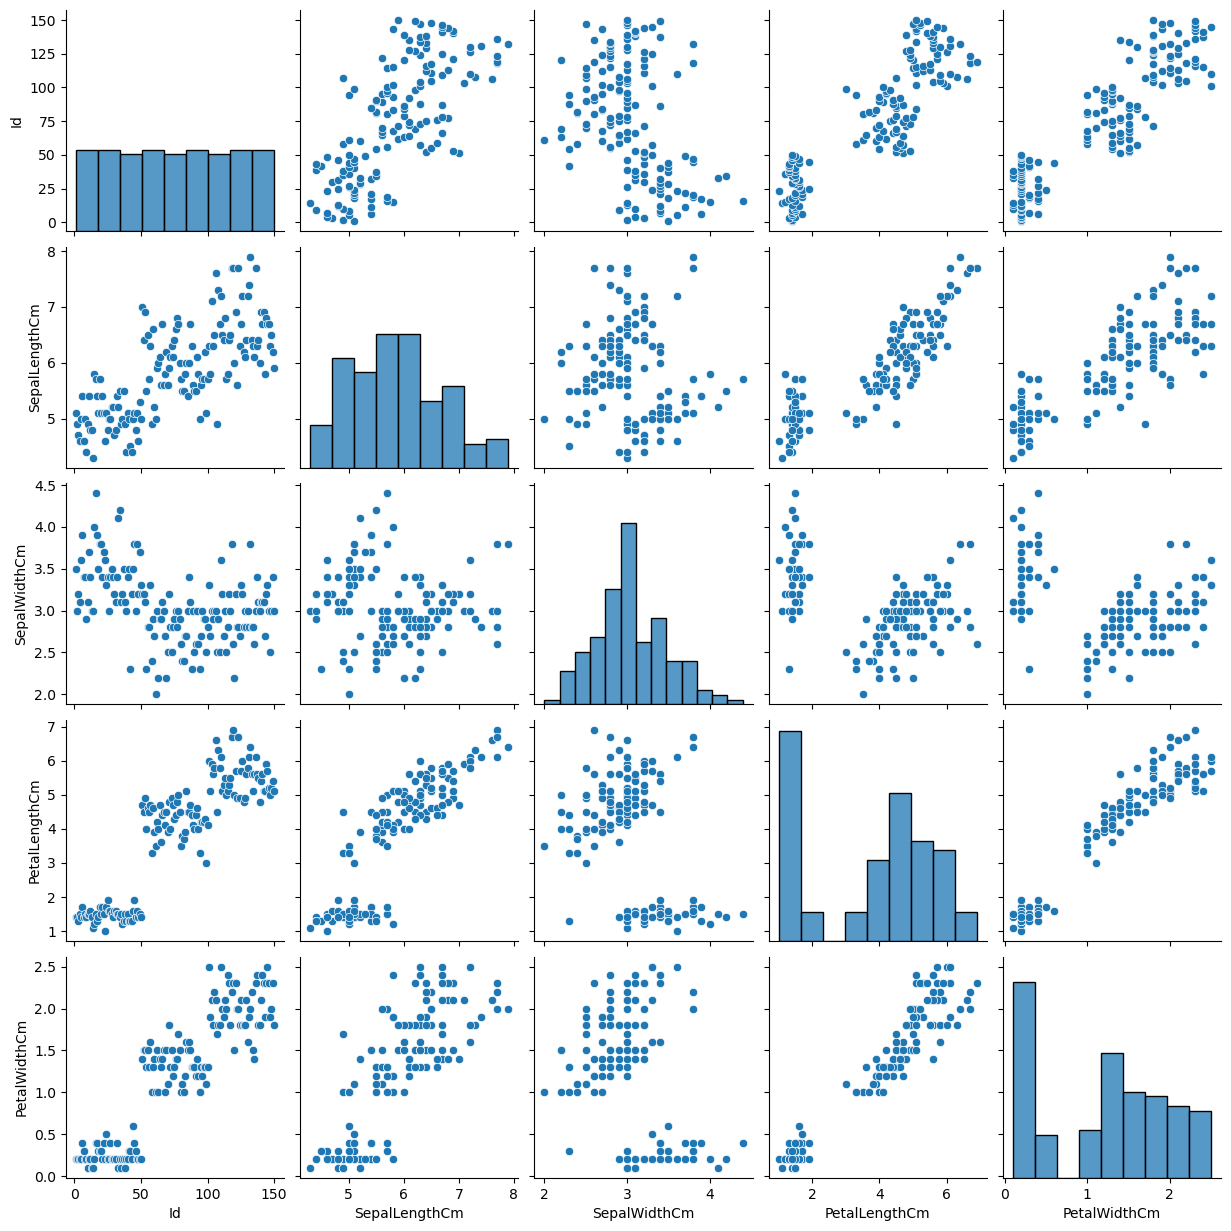

In [12]:
sns.pairplot(df)

1.If Flower's Sepal length increases then its Petal width,Petal length increases.
2.If Flower's Sepal width increases then its Petal width,Petal length increases.
3.If Flower's Petal length increases then its Petal width,Sepal length and Sepal width increases.
4.If Flower's Petal width increases then its Sepal width,Sepal length and Petal length increases.
5.Our Species target class has no imbalance state

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

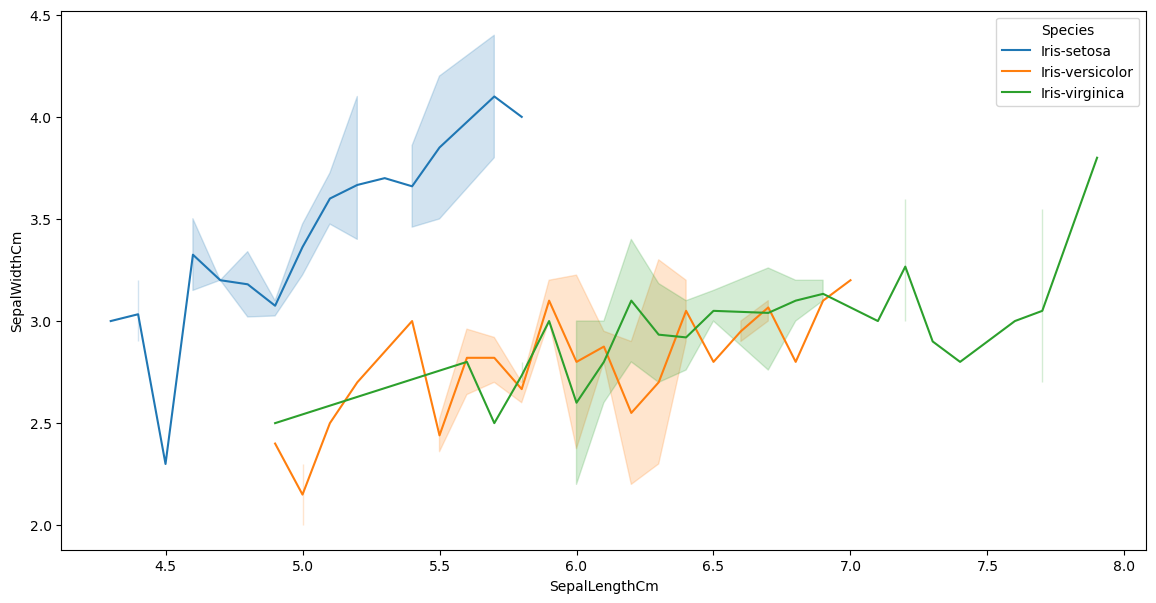

In [13]:
plt.figure(figsize=(14,7))
sns.lineplot(df['SepalLengthCm'],df['SepalWidthCm'],hue=df['Species'])

Sepal Length and Sepal Width of  Iris-Virginica Flower is Higher than other two species.

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

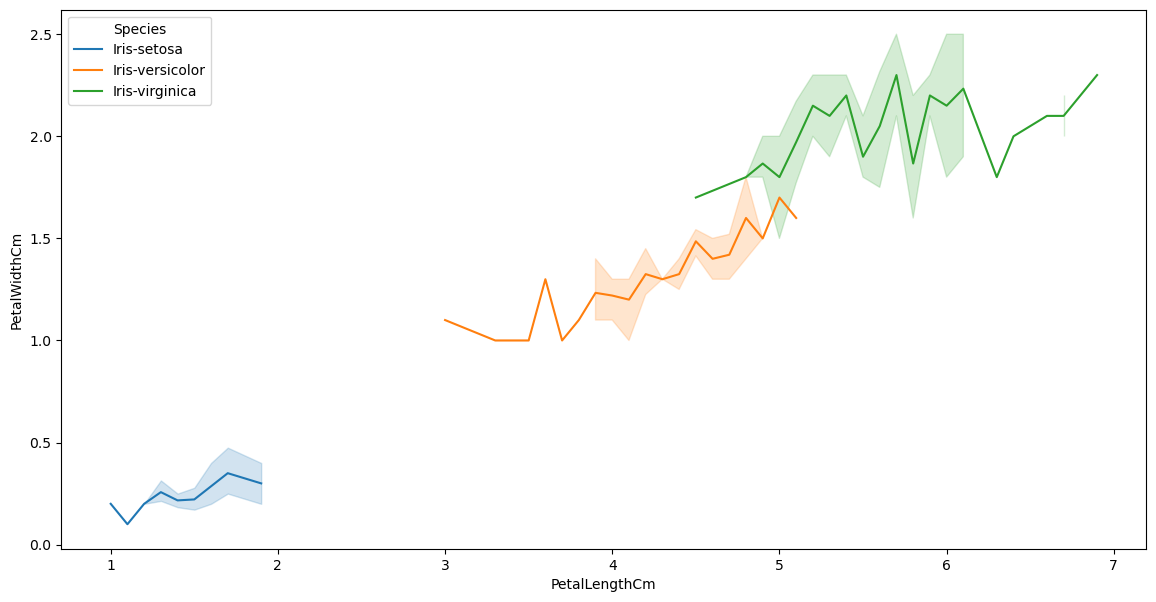

In [14]:
plt.figure(figsize=(14,7))
sns.lineplot(df['PetalLengthCm'],df['PetalWidthCm'],hue=df['Species'])

Petal Length and Petal Width of Iris-Virginica Flower is Higher than other two species.

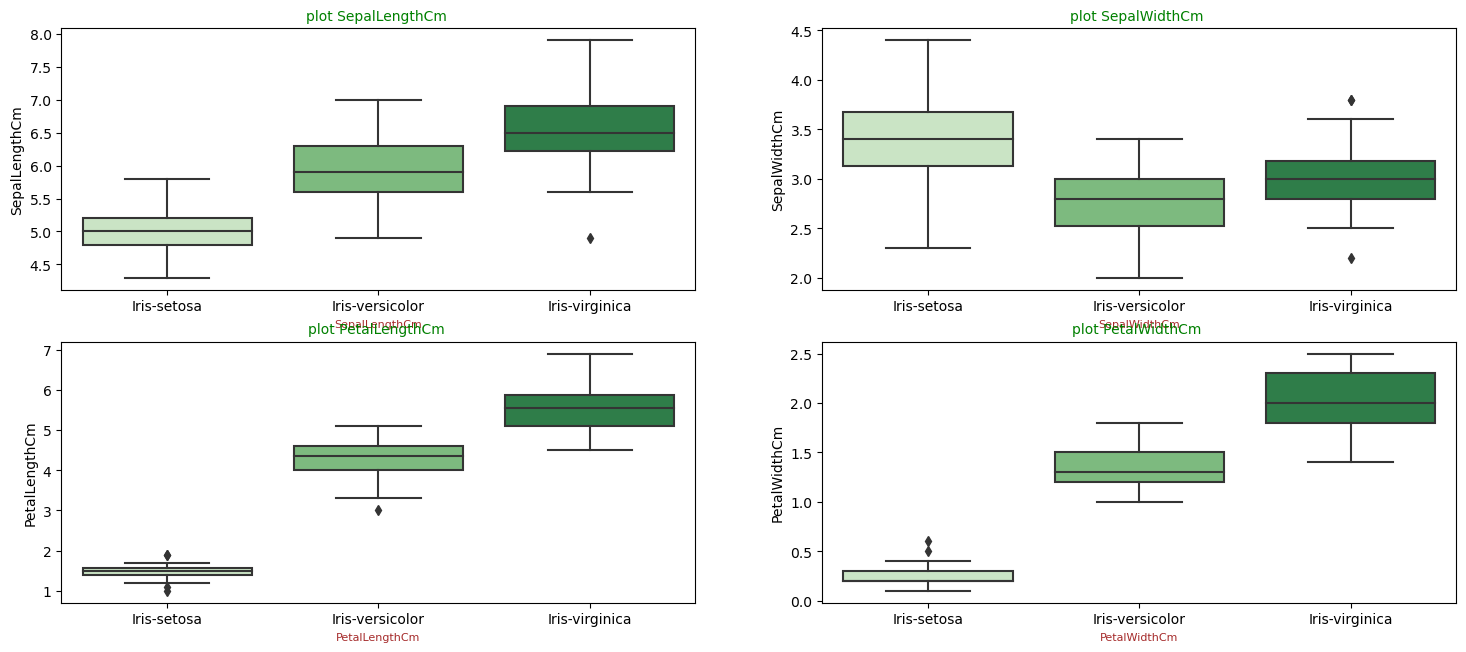

In [15]:
# Box plot of catego

discrete_cols= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

plt.figure(figsize=[18, 40])

for i, col in enumerate(discrete_cols, 1):
    plt.subplot(10,2,i)
    title_text= f'plot {col} '
    x_label= f'{col}'
    fig= sns.boxplot(data= df, x= 'Species', y=col , palette= 'Greens')
    fig.set_title(title_text, fontdict= { 'fontsize': 10, 'color': 'Green'})
    fig.set_xlabel(x_label, fontdict= {'fontsize': 8, 'color': 'Brown'})
plt.show()


Here also we can observe that iris-virginica Flower's Sepal and Petal measurements are higher in number than others

## DATA PRE-PROCESSING And FEATURE ENGINEERING

In [16]:
#converting string data type to int type using LabelEncoding
le=LabelEncoder()

list1=['Species']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [17]:
df=df.drop(['Id'],axis=1)

In [18]:
#find correlation co.efficient of all variables in table
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


The most postively correlated column with target is Petal Width and Most negatively correlated column is Sepal Width.There is no correlation

In [19]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


These shows the distribution of values by quantile wise.The difference between 75% and max value is very less.So there is not much skewness present.

### VISUALIZATION OF CORRELATION

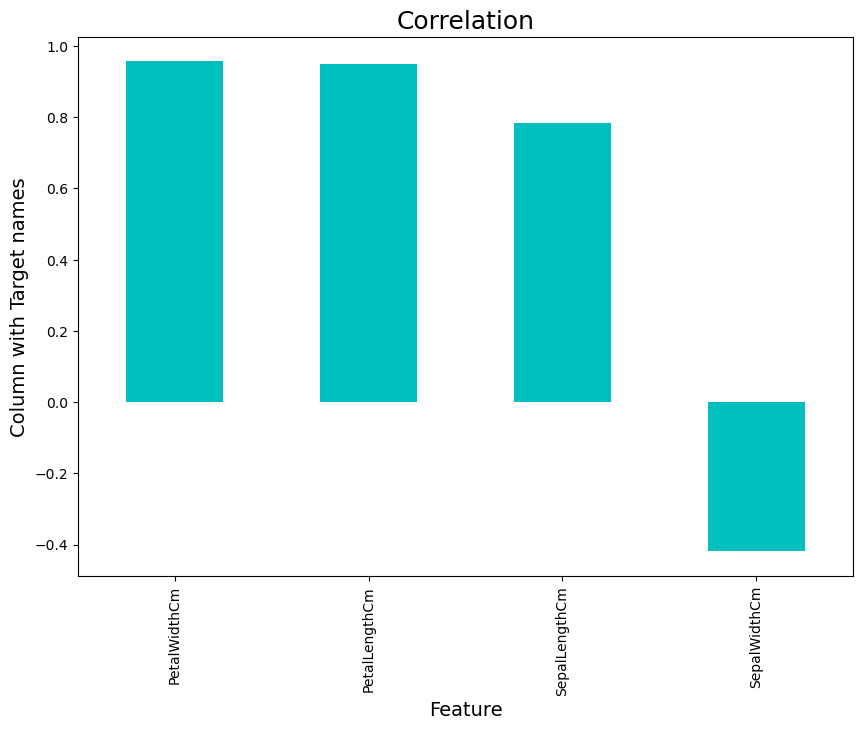

In [20]:
plt.figure(figsize=(10,7))
df.corr()['Species'].sort_values(ascending=False).drop(['Species']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

shows positively and negatively correlated column with the target column

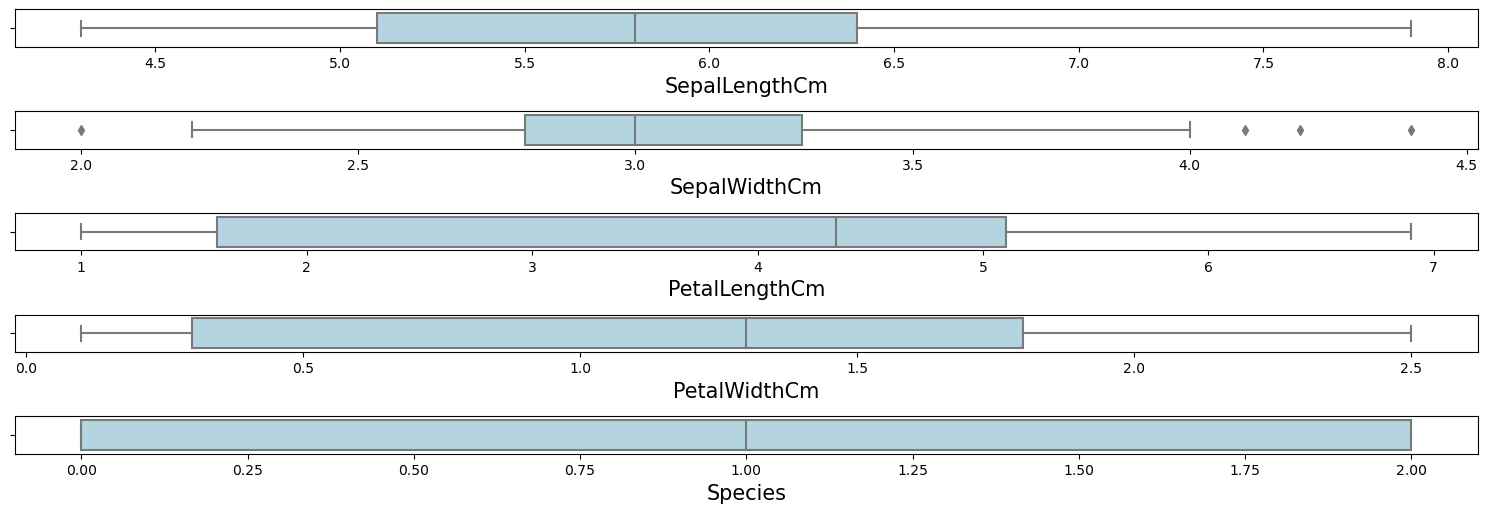

In [21]:
plt.figure(figsize= (15,20))
pltnum = 1
for i in df:
    if pltnum <=20:
        plt.subplot(20,1,pltnum)
        sns.boxplot(df[i],color = 'lightblue')
        plt.xlabel(i,fontsize=15)
    pltnum+=1
plt.tight_layout()

Here sepal width column has outliers

In [22]:
df.skew()

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
Species          0.000000
dtype: float64

Not much skewness present

## Using Quantile Method to Remove Outliers

In [24]:
continous_wise = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'] # one or more

Q1 = df[continous_wise].quantile(0.25)
Q3 = df[continous_wise].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[continous_wise] < (Q1 - 1.5 * IQR)) |(df[continous_wise] > (Q3 + 1.5 * IQR))).any(axis=1)]

df.shape

(146, 5)

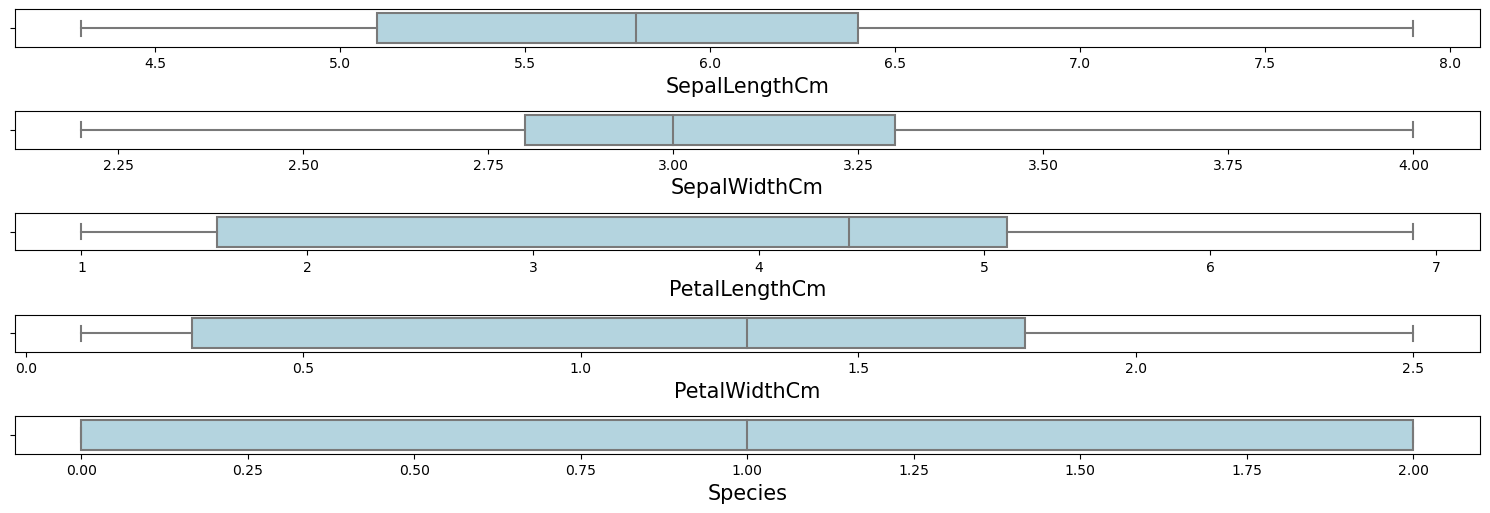

In [25]:
plt.figure(figsize= (15,20))
pltnum = 1
for i in df:
    if pltnum <=20:
        plt.subplot(20,1,pltnum)
        sns.boxplot(df[i],color = 'lightblue')
        plt.xlabel(i,fontsize=15)
    pltnum+=1
plt.tight_layout()

Outliers of Sepal width column got removed

### Data seggregation for Model Building

In [27]:
#seggregate input data and output data for model building
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

## SKEWNESS REMOVAL 

In [28]:
#removing skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.90581879,  1.16657324, -1.35780666, -1.35302999],
       [-1.18819651, -0.06620536, -1.35780666, -1.35302999],
       [-1.48212217,  0.43692264, -1.40848935, -1.35302999],
       [-1.63369371,  0.18711245, -1.30671879, -1.35302999],
       [-1.04561684,  1.4035824 , -1.35780666, -1.35302999],
       [-0.50215357,  2.09743058, -1.20337929, -1.08080981],
       [-1.63369371,  0.92653396, -1.35780666, -1.21657685],
       [-1.04561684,  0.92653396, -1.30671879, -1.35302999],
       [-1.94666736, -0.32316963, -1.35780666, -1.35302999],
       [-1.18819651,  0.18711245, -1.30671879, -1.49023044],
       [-0.50215357,  1.63766433, -1.30671879, -1.35302999],
       [-1.33366173,  0.92653396, -1.25523892, -1.35302999],
       [-1.33366173, -0.06620536, -1.35780666, -1.49023044],
       [-2.10833657, -0.06620536, -1.50858127, -1.49023044],
       [ 0.0025686 ,  2.32329432, -1.45875268, -1.35302999],
       [-0.50215357,  2.09743058, -1.40848935, -1.08080981],
       [-0.90581879,  1.

## SCALING

In [29]:
#scaling to get better model performance
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
x = mmscaler.fit_transform(x)
x

array([[0.28060433, 0.74639756, 0.05864822, 0.04345058],
       [0.21471224, 0.47612008, 0.05864822, 0.04345058],
       [0.14612546, 0.58642713, 0.04379724, 0.04345058],
       [0.11075665, 0.53165811, 0.07361792, 0.04345058],
       [0.24798282, 0.79836004, 0.05864822, 0.04345058],
       [0.37479853, 0.95048107, 0.10389833, 0.12966111],
       [0.11075665, 0.69377074, 0.05864822, 0.08666449],
       [0.24798282, 0.69377074, 0.07361792, 0.04345058],
       [0.03772508, 0.41978259, 0.05864822, 0.04345058],
       [0.21471224, 0.53165811, 0.07361792, 0.        ],
       [0.37479853, 0.84968076, 0.07361792, 0.04345058],
       [0.18076831, 0.69377074, 0.08870249, 0.04345058],
       [0.18076831, 0.47612008, 0.05864822, 0.        ],
       [0.        , 0.47612008, 0.01446844, 0.        ],
       [0.49257411, 1.        , 0.02906915, 0.04345058],
       [0.37479853, 0.95048107, 0.04379724, 0.12966111],
       [0.28060433, 0.74639756, 0.05864822, 0.08666449],
       [0.4639127 , 0.90038103,

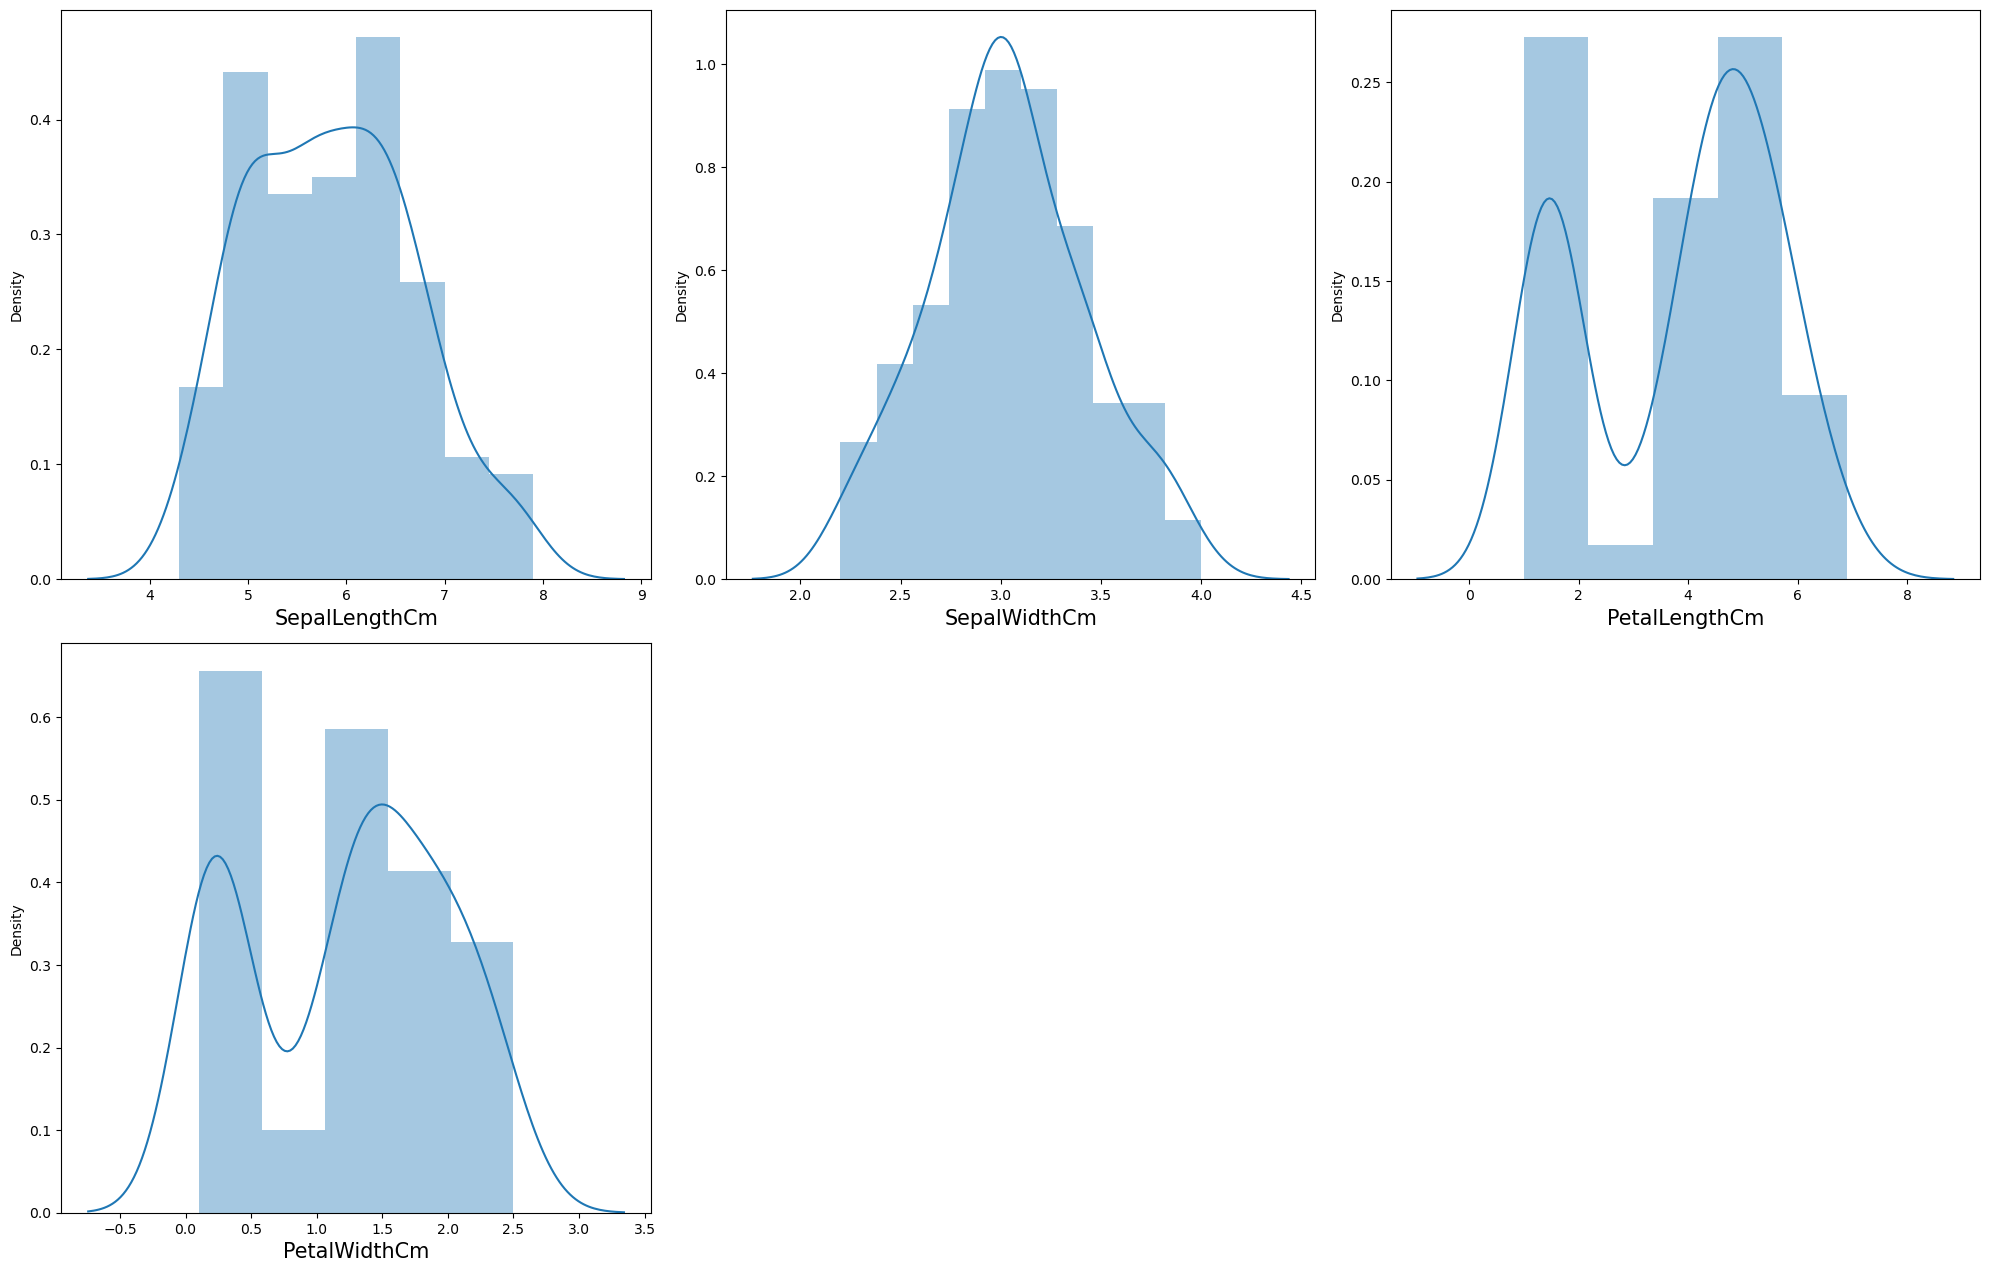

In [30]:
plt.figure(figsize = (20, 25))
plotnumber = 1

for col in continous_wise:
    if plotnumber <= 12:
        ax = plt.subplot(4,3, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

## MODEL PREDICTION

In [31]:
#train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

## DECISION TREE CLASSIFIER

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(random_state=1)
dtc.fit(x_train, y_train)
pred_test_dtc = dtc.predict(x_test)
pred_train_dtc = dtc.predict(x_train)
dtc_score = dtc.score(x_test,y_test)
print('score of model is : ',dtc_score*100)



score of model is :  90.9090909090909


In [34]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_dtc)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_dtc)*100)


Accuracy Score of Training Data is: 100.0
Accuracy Score of Testing Data is: 90.9090909090909


## Hyper Parameter Tuning

In [37]:
#perform gridsearchcv and cross val score on Decison Tree DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters={'criterion':['gini', 'entropy'],'splitter':['best','random'],'max_features':['auto', 'sqrt', 'log2'],'random_state':list(range(0,10)),'max_depth':[11],'min_samples_split': [2,3,4],'min_samples_leaf':[1,2,3] }
dt=DecisionTreeClassifier()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 4, 'splitter': 'best'}


In [38]:
dt=DecisionTreeClassifier(criterion='gini',max_features= 'auto',max_depth= 11 , random_state= 4, splitter= 'best',min_samples_leaf= 1,min_samples_split= 2)
dt_model_fit=dt.fit(x_train,y_train)
pred_test_dt=dt.predict(x_test)
pred_train_dt=dt.predict(x_train)
dt_score = dt.score(x_train,y_train)
dt_acc_score=accuracy_score(y_test,pred_test_dt)
print("Accuracy score is:",dt_acc_score*100)
print("score of model is:",dt_score*100)

Accuracy score is: 90.9090909090909
score of model is: 100.0


## CROSS VALIDATION

In [39]:
cv_score_dt=cross_val_score(dt,x,y,cv=5)
cv_mean_dt=cv_score_dt.mean()
print("cv_mean is:",cv_mean_dt*100)

cv_mean is: 95.88505747126436


#### Confusion Matrix

In [40]:
print(confusion_matrix(y_test,pred_test_dtc))

[[11  0  0]
 [ 0 12  1]
 [ 0  3 17]]


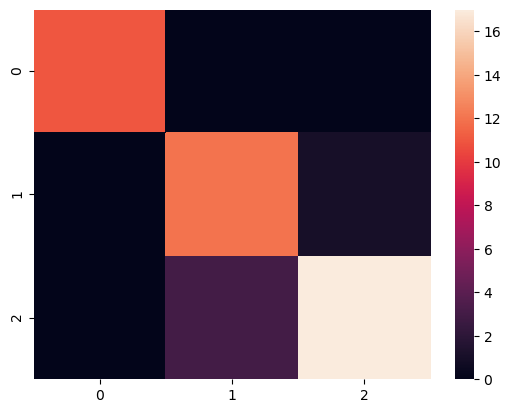

In [41]:
#visualizing confusion matrix with the help of heatmap
sns.heatmap(confusion_matrix(y_test,pred_test_dtc))
plt.show()

#### Classification Report

In [44]:
print(classification_report(y_test,pred_test_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.80      0.92      0.86        13
           2       0.94      0.85      0.89        20

    accuracy                           0.91        44
   macro avg       0.91      0.92      0.92        44
weighted avg       0.92      0.91      0.91        44



## AUC-ROC CURVE:

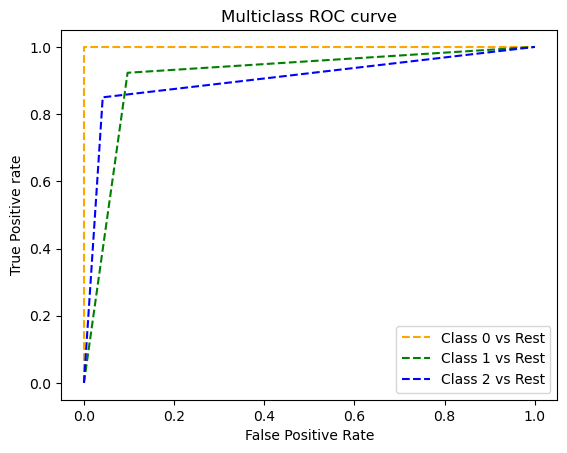

In [45]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

# generate 2 class dataset
#x, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)

# fit model
clf = OneVsRestClassifier(DecisionTreeClassifier())
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue',label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

Area under the curve for iris-setosa is higher and has best prediction among others.

## CONCLUSION


### OUTPUT

In [46]:
import numpy as np
a=np.array(y_test)
predicted=np.array(dtc.predict(x_test))
df_con=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_con


,Original,Predicted
0,2,2
1,1,1
2,2,2
3,1,1
4,2,2
5,2,2
6,0,0
7,2,2
8,2,2
9,0,0


## SAVE MODEL

In [47]:
import pickle
filename='Iris_Flower_Classification_dtc.pkl'
pickle.dump(dtc,open(filename,'wb'))


In [48]:
models=['DecisionTreeClassifier']
models     

['DecisionTreeClassifier']

In [49]:
scores=[accuracy_score(y_test,pred_test_dt)*100]
scores

[90.9090909090909]

In [50]:
import pandas as pd
Model_scores=pd.DataFrame({})
Model_scores['Model Names']=models
Model_scores['Scores']=scores
Model_scores

,Model Names,Scores
0,DecisionTreeClassifier,90.909091


#### Saving output to CSV File

In [51]:
df_con.to_csv("Iris Flower Classification_dt.csv",sep='\t')

## You can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.



# Make New Test Data Ready

In [53]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd

In [55]:
# Loading the iris dataset from sklearn 
iris=datasets.load_iris()

In [56]:
# Forming the iris dataframe
test_input=pd.DataFrame(iris.data, columns=iris.feature_names)
print(test_input.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [57]:
test_input.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [58]:
test_target=iris.target
print(test_target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Visualize Decision Tree

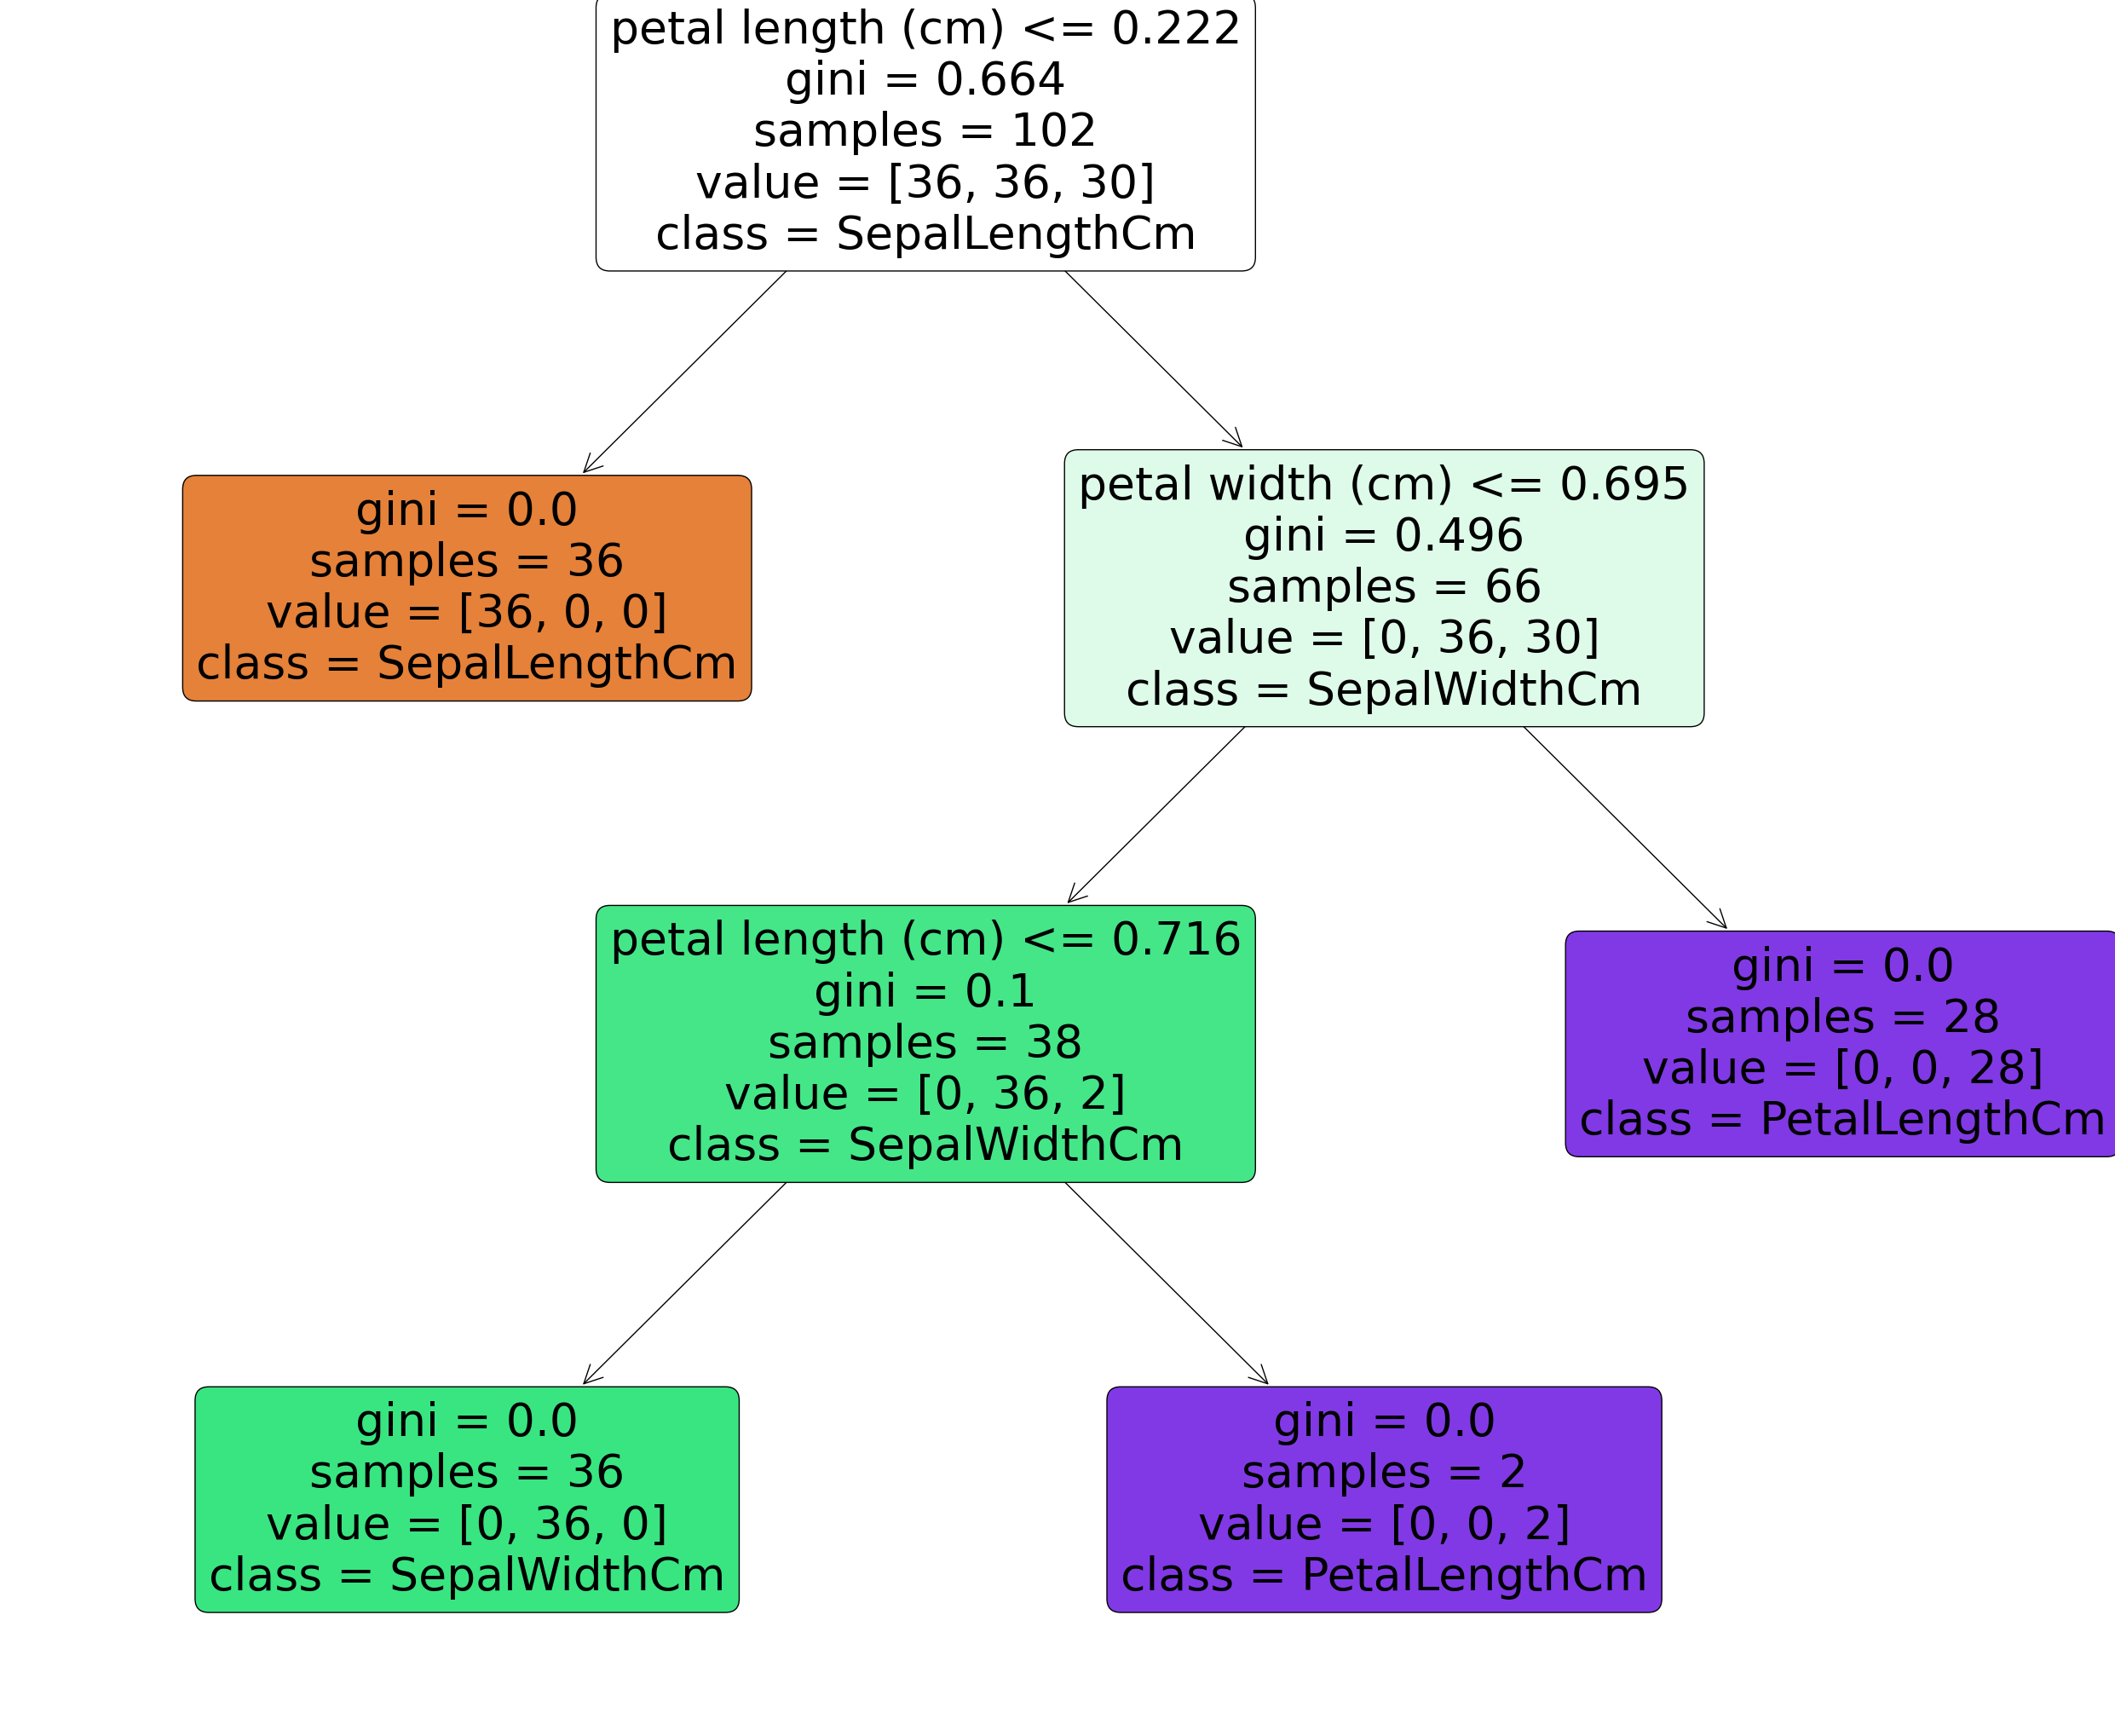

In [59]:
#visualizing Decision Tree 
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(dt,feature_names=iris.feature_names,
              class_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],
              rounded=True,filled=True);

## Apply same procedure as we did to dataset before

In [62]:
continous_wise1 = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)'] 

Q1 = test_input[continous_wise1 ].quantile(0.25)
Q3 = test_input[continous_wise1 ].quantile(0.75)
IQR = Q3 - Q1

In [63]:
test_input= test_input[~((test_input[continous_wise1 ] < (Q1 - 1.5 * IQR)) |(test_input[continous_wise1 ] > (Q3 + 1.5 * IQR))).any(axis=1)]

test_input.shape

(146, 4)

In [65]:
#removing skewness
from sklearn.preprocessing import power_transform
test_input=power_transform(test_input,method='yeo-johnson')
test_input

array([[-9.06145161e-01,  1.15048621e+00, -1.28957755e+00,
        -1.30489917e+00],
       [-1.18674936e+00, -7.37296262e-02, -1.28957755e+00,
        -1.30489917e+00],
       [-1.47849054e+00,  4.26017875e-01, -1.32743779e+00,
        -1.30489917e+00],
       [-1.62881441e+00,  1.77925832e-01, -1.25112652e+00,
        -1.30489917e+00],
       [-1.04510778e+00,  1.38581501e+00, -1.28957755e+00,
        -1.30489917e+00],
       [-5.04362173e-01,  2.07487980e+00, -1.17242831e+00,
        -1.07561444e+00],
       [-1.62881441e+00,  9.12159040e-01, -1.28957755e+00,
        -1.19074545e+00],
       [-1.04510778e+00,  9.12159040e-01, -1.25112652e+00,
        -1.30489917e+00],
       [-1.93897566e+00, -3.29102065e-01, -1.28957755e+00,
        -1.30489917e+00],
       [-1.18674936e+00,  1.77925832e-01, -1.25112652e+00,
        -1.41821723e+00],
       [-5.04362173e-01,  1.61825613e+00, -1.25112652e+00,
        -1.30489917e+00],
       [-1.33117387e+00,  9.12159040e-01, -1.21207909e+00,
      

In [66]:
#scaling to get better model performance
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
test_input = mmscaler.fit_transform(test_input)
test_input

array([[0.27831841, 0.74647971, 0.04060219, 0.03494174],
       [0.21285168, 0.47630753, 0.04060219, 0.03494174],
       [0.14478663, 0.5865968 , 0.03021087, 0.03494174],
       [0.10971512, 0.53184537, 0.05115566, 0.03494174],
       [0.24589756, 0.79841441, 0.04060219, 0.03494174],
       [0.37205691, 0.95048411, 0.07275558, 0.10564193],
       [0.10971512, 0.69388329, 0.04060219, 0.07014116],
       [0.24589756, 0.69388329, 0.05115566, 0.03494174],
       [0.03735255, 0.4199494 , 0.04060219, 0.03494174],
       [0.21285168, 0.53184537, 0.05115566, 0.        ],
       [0.37205691, 0.84971184, 0.05115566, 0.03494174],
       [0.17915654, 0.69388329, 0.06187282, 0.03494174],
       [0.17915654, 0.47630753, 0.04060219, 0.        ],
       [0.        , 0.47630753, 0.00991037, 0.        ],
       [0.48958738, 1.        , 0.01998053, 0.03494174],
       [0.37205691, 0.95048411, 0.03021087, 0.10564193],
       [0.27831841, 0.74647971, 0.04060219, 0.07014116],
       [0.4609455 , 0.90039468,

### MAKE PREDICTION BY USING OUR SEPERATE NEW TEST DATA SET 

### Predict the output for new unseen Test data

In [71]:
pred_test_new_raw_data=dt.predict(test_input)
pred_test_new_raw_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1])

In [72]:
pred_test_new_raw_data.shape

(146,)

In [73]:
test_target.shape

(150,)

In [74]:
test_target=test_target[:146]

## Compare New Predicted Result with iris.Target

In [75]:
import numpy as np
a=np.array(test_target)
predicted=np.array(dt.predict(test_input))
df_con2=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_con2

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
141,2,2
142,2,2
143,2,2
144,2,2


## Accuracy for New Test Data

In [76]:
dtc_acc_score_unseen_data=accuracy_score(test_target,pred_test_new_raw_data)*100
dtc_acc_score_unseen_data

88.35616438356165

Key Insights:

The Species are  identified and classified  mostly by Petal Width,Petal length and Sepal Width features.
            

Thus Decision Tree Classifier Algorithm performs well.A significant advantage of a decision tree is that it forces the consideration of all possible outcomes of a decision and traces each path to a conclusion. It creates a comprehensive analysis of the consequences along each branch and identifies decision nodes that need further analysis.It is one of the best predictive models Because it allows partition of data in a very deep level.It will also reduce ambiguity in decision making process.

So We Save this model for prediction